<a href="https://colab.research.google.com/github/Hasebul21/brainstorm-ml/blob/main/logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [159]:
df = pd.read_csv('logistic_regression_dataset.csv')
df.head(5)

,Age,Salary,Gender,Education,Department,Experience,Purchased
0,39.0,NaN,Male,NaN,Finance,2,0
1,58.0,69819.0,Male,Bachelors,Marketing,18,0
2,NaN,104416.0,Other,Masters,Marketing,7,0
3,42.0,NaN,Female,Masters,IT,3,0
4,32.0,NaN,Other,PhD,Marketing,3,1


***Check if nan or missing value***

In [160]:
df.isnull().sum()

,0
Age,50
Salary,50
Gender,50
Education,50
Department,50
Experience,0
Purchased,0


***Age and salary are numeric data type so we can use simple imputer to fill missing values***

In [161]:
imp = SimpleImputer(strategy='median')
df[['Age', 'Salary']] = imp.fit_transform(df[['Age', 'Salary']])
text_imp = SimpleImputer(strategy='most_frequent')
df[['Gender', 'Education', 'Department']] = text_imp.fit_transform(df[['Gender', 'Education', 'Department']])
df.isnull().sum()

,0
Age,0
Salary,0
Gender,0
Education,0
Department,0
Experience,0
Purchased,0


***check Education can be converted into ordinal value***

In [162]:
df['Education'].unique()
ordinal_en = OrdinalEncoder(categories=[['High School', 'Bachelors', 'Masters', 'PhD']])
df[['Education']] = ordinal_en.fit_transform(df[['Education']])

***Convert other categorial columns into one hot encoder***

In [163]:
one_encode = OneHotEncoder(sparse_output=False)
gender_encoded = one_encode.fit_transform(df[['Gender']])
gender_df = pd.DataFrame(
    gender_encoded,
    columns=one_encode.get_feature_names_out(['Gender']),
    index=df.index
)
one_encode_2 = OneHotEncoder(sparse_output=False)
dept_encoded = one_encode_2.fit_transform(df[['Department']])
dept_df = pd.DataFrame(
    dept_encoded,
    columns=one_encode_2.get_feature_names_out(['Department']),
    index=df.index
)
df = df.drop(columns=['Gender', 'Department']).join([gender_df, dept_df])


***Check for outliner***

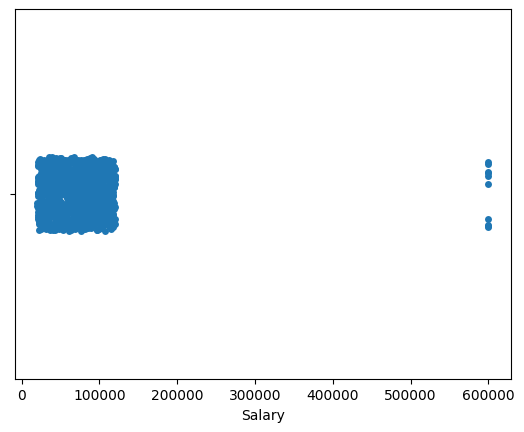

In [164]:
sb.stripplot(x=df['Salary'], jitter=True)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


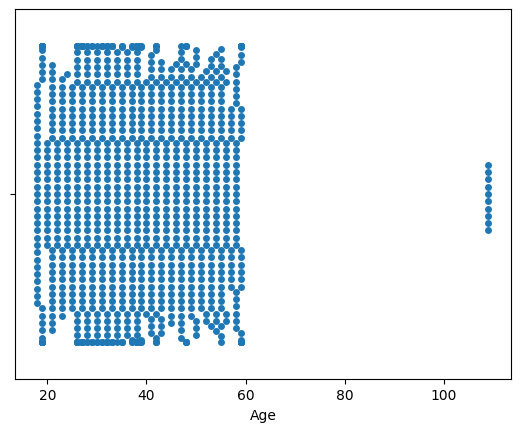

In [165]:
sb.swarmplot(x=df['Age'])
plt.show()

In [166]:
Q1 = df['Salary'].quantile(0.25)
Q2 = df['Salary'].quantile(0.75)
IQR = Q2 - Q1
lower_bound = Q1 - (1.5) * IQR
upper_bound = Q2 - (1.5) * IQR
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

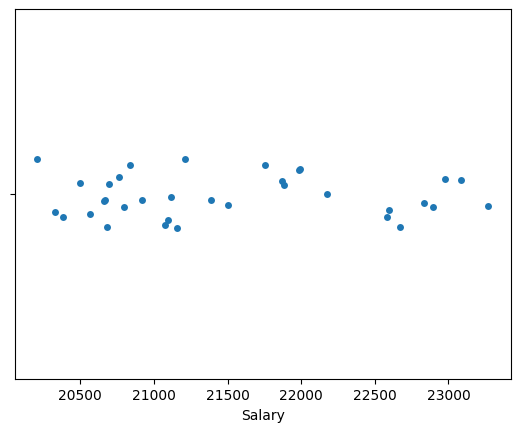

In [167]:
sb.stripplot(x=df['Salary'], jitter=True)
plt.show()

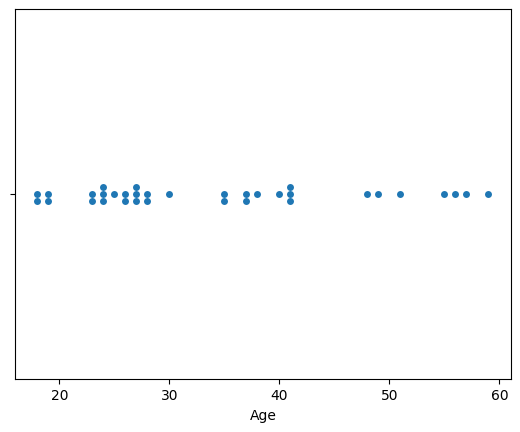

In [168]:
sb.swarmplot(x=df['Age'])
plt.show()

In [169]:
X = df.drop('Purchased', axis=1)
Y = df['Purchased']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.6666666666666666